## Download data

In [ ]:
! curl -O http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz

In [ ]:
! tar xvzf 101_ObjectCategories.tar.gz

## Load helpers script

In [16]:
%run features_extractor.py

## Load data

In [2]:
filenames = get_filenames("101_ObjectCategories//**//*.*")

Found 9144 files using pattern: 101_ObjectCategories//**//*.*


In [3]:
imgs_np = get_images(filenames, target_size=(200,200), color='RGB', bg_clr=0)

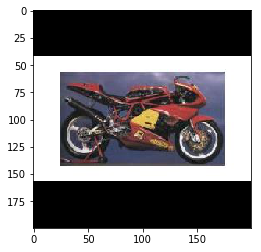

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imgs_np[70])

In [5]:
imgs_np.shape

(9144, 200, 200, 3)

## Generate features

In [17]:
embeddings = extract_features(imgs_np, pretrained_model="resnet50")

Input images shape:  (9144, 200, 200, 3)


/anaconda/envs/py35/lib/python3.5/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/data/home/karolzak/notebooks/VisualSimilaritySearch/images-vector-search/features_extractor.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  model = Model(input=base_model.input, output=[x])


Features shape:  (9144, 2048)


In [19]:
embeddings.shape

(9144, 2048)

## Find nearest neighbors using euclidean distance

In [21]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(embeddings)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [22]:
predictions = knn.kneighbors(embeddings, 10)

In [23]:
pred = predictions[1] # 0 - array of distances (ascending), 1 - array of coresponding indexes of similar images

## Plot queries

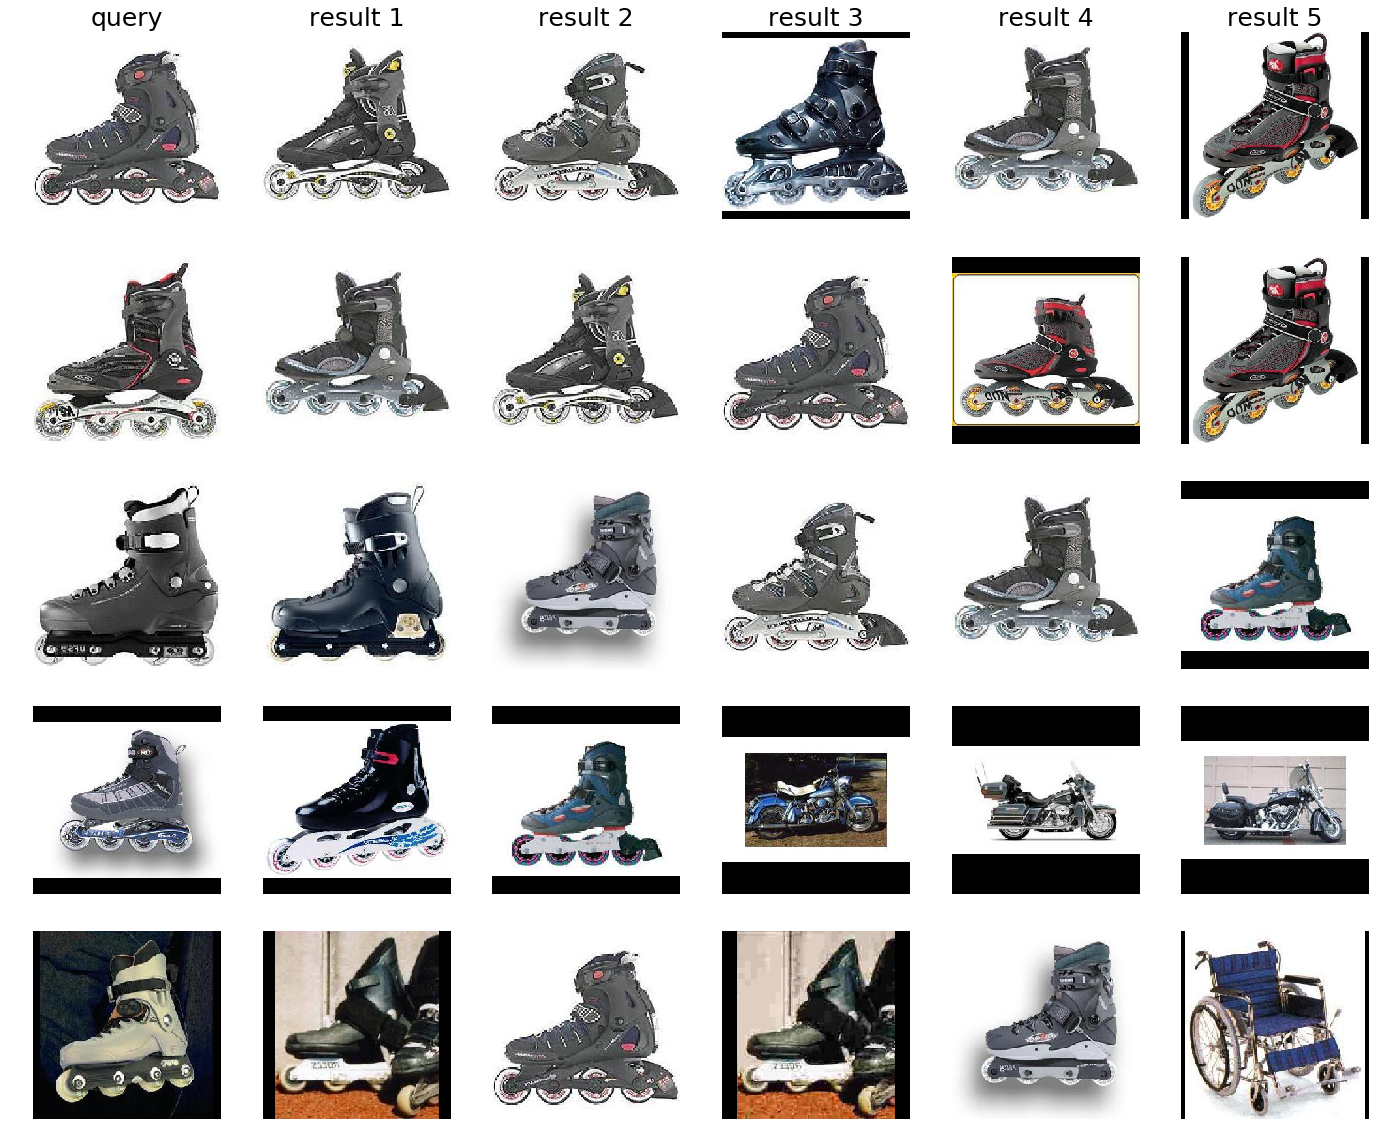

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

im_id = 7000 # start plotting images from that ID
nm_neighbors = 5 # how many top similar images to show
nm_neighbors += 1 # ignore that - its needed for correct plotting
nm_img_to_plot = 5 # how many image queries to plot

fig, axes = plt.subplots(nm_img_to_plot, nm_neighbors, figsize=(nm_neighbors*4, nm_img_to_plot*4))
axes[0, 0].set_title("query", fontsize=25)
for i in range(1, nm_neighbors):
    axes[0, i].set_title("result %s" % i, fontsize=25) 
for m in range(0, nm_img_to_plot):    
    for n in range(0, nm_neighbors):
        axes[m, n].axis('off')
        axes[m, n].imshow(imgs_np[pred[im_id][n]])
    im_id += 1